In [27]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

#Machine Learning in Python
##Intermediate Linear Regression

###1: Introduction to the data

The Leaning Tower of Pisa is one of the largest tourist attractions in Italy. For hundreds of years this tower slowly leaned to one side, eventually reaching 5.5 degrees off axis, nearly 3 meters horizontal at it's peak. Yearly data was recorded from 1975 to 1987 measuing the tower's lean. In 1988 restoration began on the tower to stop more leaning in the future. The data is provided in the dataframe pisa. The column lean represents the number of meters the tower is off axis at the respective year. In this mission we will try to estimate the leaning rate using a linear regression and interpret its coefficient and statistics.

####Instructions

Create a scatter plot with year on the x-axis and lean on the y-axis.

      lean  year
0   2.9642  1975
1   2.9644  1976
2   2.9656  1977
3   2.9667  1978
4   2.9673  1979
5   2.9688  1980
6   2.9696  1981
7   2.9698  1982
8   2.9713  1983
9   2.9717  1984
10  2.9725  1985
11  2.9742  1986
12  2.9757  1987


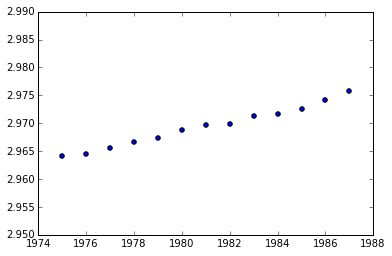

In [28]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

pisa = pandas.DataFrame({"year": range(1975, 1988), 
                         "lean": [2.9642, 2.9644, 2.9656, 2.9667, 2.9673, 2.9688, 2.9696, 
                                  2.9698, 2.9713, 2.9717, 2.9725, 2.9742, 2.9757]})

print(pisa)
plt.scatter(pisa["year"], pisa["lean"])

###2: Fit the Linear Model

From the scatter plot you just made, we visually see that a linear regression looks to be a good fit for the data.

Statsmodels is a library which allows for rigorous statistical analysis in python. For linear models, statsmodels provides ample statistical measures for proper evaluation. The class sm.OLS is used to fit linear models, standing for oridinary least squares. After the initialization of our model we fit data to it using the .fit() method that estimates the coefficients of the linear model. OLS() does not automatically add an intercept to our model. We can add a column of 1's to add another coefficient to our model and since the coefficient is multiplied by 1 we are given an intercept.

####Instructions

linearfit contains the fitted linear model to our data. Print the summary of the model by using the method .summary(). Do not worry about understanding all of the summary, we will cover many of the statistics in the following screens.

In [29]:
import statsmodels.api as sm

y = pisa.lean # target
X = pisa.year  # features
X = sm.add_constant(X)  # add a column of 1's as the constant term

# OLS -- Ordinary Least Squares Fit
linear = sm.OLS(y, X)
# fit model
linearfit = linear.fit()
print(linearfit.summary())

                            OLS Regression Results                            
Dep. Variable:                   lean   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     904.1
Date:                Mon, 28 Sep 2015   Prob (F-statistic):           6.50e-12
Time:                        18:10:28   Log-Likelihood:                 83.777
No. Observations:                  13   AIC:                            -163.6
Df Residuals:                      11   BIC:                            -162.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.1233      0.061     18.297      0.0

###3: Define a Basic Linear Model

We see that the printed summary contains a lot of information about our model. To understand these statistical measures we must start with a formal definition of a basic linear regression model. Mathematically, a basic linear regression model is defined as yi=β0+β1xi+ei where ei∼N(0,σ2) is the error term for each observation i where β0 is the intercept and β1 is the slope. The residual for the prediction of observation i is ei=yi^−yi where yi^ is the prediction. As introduced previously, N(0,σ2) is a normal distribution with mean 0 and a variance σ2. This means that the model assumes that the errors, known as residuals, between our prediction and observed values are normally distributed and that the average error is 0. Estimated coefficients, those which are modeled, will be refered to as βi^ while βi is the true coefficient which we cannot calculated. In the end, yi^=β0^+β1^xi is the model we will estimate.

####Instructions

Using linearfit with data X and y predict the residuals. Residuals are computed by subtracting the observed values from the predicted values. Assign the residuals to variable residuals.

In [30]:
# Our predicted values of y
yhat = linearfit.predict(X)
print(yhat)
residuals = yhat - y

[ 2.96377802  2.96470989  2.96564176  2.96657363  2.96750549  2.96843736
  2.96936923  2.9703011   2.97123297  2.97216484  2.9730967   2.97402857
  2.97496044]


###4: Histogram of Residuals

We've used histograms in the past to visualize the distribution of our data. By creating a histogram of our residuals we can visually accept or reject the assumption of normality of the errors. If the histogram of residuals look similar to a bell curve then we will accept the assumption of normality. There are more rigorous statistical tests to test for normality which we will cover in future lessons.

####Instructions

Create a histogram with 5 bins of the residuals using matplotlib's hist() function. The bins parameter allows us to define the number of bins.

(array([ 1.,  3.,  4.,  2.,  3.]),
 array([ -7.39560440e-04,  -4.72307692e-04,  -2.05054945e-04,
          6.21978022e-05,   3.29450549e-04,   5.96703297e-04]),
 <a list of 5 Patch objects>)

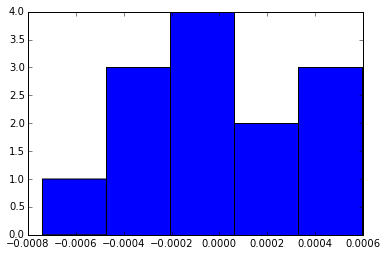

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(residuals, bins=5)

###5: Interpretation of Histogram

Our dataset only has 13 observations in it making it difficult to interpret such a plot. Though the plot looks somewhat normal the largest bin only has 4 observations. In this case we cannot reject the assumption that the residuals are normal. Lets move forward with this linear model and look at measures of statistical fit.

###6: Sum of Squares

Many of the statistical measures used to evaluate linear regression models rely on three sum of squares measures. The three measures include Sum of Square Error (SSE), Regression Sum of Squares (RSS), and Total Sum of Squares (TSS). In aggregate each of these measures explain the variance of the entire model. We define the measures as the following:

SSE=∑ni=1(yi−yi^)2=∑ni=1e2i. We see that SSE is the sum of all residuals giving us a measure between the model's prediction and the observed values.

RSS=∑ni=1(yi¯−yi^)2 where yi¯=1n∑ni=1yi. RSS measures the amount of explained variance which our model accounts for. For instance, if we were to predict every observation as the mean of the observed values then our model would be useless and RSS would be very low. A large RSS and small SSE can be an indicator of a strong model.

TSS=∑ni=1(yi−yi¯)2. TSS measures the total amount of variation within the data.

With some algebra we can show that TSS=RSS+SSE. Intuitively this makes sense, the total amount of variance in the data is captured by the variance explained by the model plus the variance missed by the model.

####Instructions

Compute the RSS and TSS for our model, linearfit, using the formulas above. Assign the RSS to variable RSS and the TSS to variable TSS.

In [32]:
import numpy as np

# sum the (predicted - observed) squared
SSE = np.sum((yhat-y.values)**2)
print "SSE: ", SSE

# Average y
ybar = np.mean(y.values)
print "ybar: ", ybar

# sum the (mean - predicted) squared
RSS = np.sum((ybar-yhat)**2)
print "RSS: ", RSS

# sum the (mean - observed) squared
TSS = np.sum((ybar-y.values)**2)
print "TSS: ", TSS

SSE:  1.92285714286e-06
ybar:  2.96936923077
RSS:  0.000158044835165
TSS:  0.000159967692308


###7: R-Squared

The coefficient of determination, also known as R-Squared, is a great measure of linear dependence. It is a single number which tells us what the percentage of variation in the target variable is explained by our model.

R2 = 1− (SSE / TSS) = (RSS / TSS)

Intuitively we know that a low SSE and high RSS indicates a good fit. This single measure tells us what percentage of the total variation of the data our model is accounting for. Correspondingly, the R2 exists between 0 and 1.

####Instructions

Compute the R-Squared for our model, linearfit. Assign the R-squared to variable R2.

In [33]:
R2 = RSS / TSS
print "R2: ", R2

R2:  0.987979715684


###8: Interpretation of R-Squared

We see that the R-Squared value is very high for our linear model, 0.988, accounting for 98.8% of the variation within the data.

###9: Coefficients of the Linear Model

The ability to understand and interpret coefficients is a huge advantage of linear models over some more complex ones. Each $βi$ in a linear model f(x)=β0+β1x is a coefficient. Fortunately there are methods to find the confidence of the estimated coefficients.

Below we see the summary of our model. There are many statistics here including R-squared, the number of observations, and others. In the second section there are coefficients with corresponding statistics. The row year corresponds to the independent variable x while lean is the target variable. The variable const represents the model's intercept.

First we look at the coefficient itself. The coefficient measures how much the dependent variable will change with a unit increase in the independent variable. For instance, we see that the coefficient for year is 0.0009. This means that on average the tower of pisa will lean 0.0009 meters per year.

####Instructions

Assuming no external forces on the tower, how many meters will the tower of pisa lean in 15 years? Assign the number of meters moved to variable delta.

In [34]:
print("\n",linearfit.params)
delta = linearfit.params["year"] * 15

('\n', const    1.123338
year     0.000932
dtype: float64)


###10: Variance of Coefficients

The variance of each of the coefficients is an important and powerful measure. In our example the coefficient of year represents the number of meters the tower will lean each year. The variance of this coefficient would then give us an interval of the expected movement for each year.

In the summary output, next to each coefficient, you see a column with standard errors. The standard error is the square root of the estimated variance. The estimated variance for a single variable linear model is defined as: 

s^2(β1^) = (∑ni=1(yi−yi^)^2) / ((n−2)∑ni=1(xi−x)^2) = SSE / ((n−2)∑ni=1(xi−x)^2)

This formulation can be shown by taking the variance of our estimated β1^ but we will not cover that here. Analyzing the formula term by term we see that the numerator, SSE, represents the error within the model. A small error in the model will then decrease the coefficient's variance. The denomenator term, ∑ni=1(xi−x)^2, measures the amount of variance within x. A large variance within the independent variable decreases the coefficient's variance. The entire value is divided by (n-2) to normalize over the SSE terms while accounting for 2 degrees of freedom in the model.

Using this variance we will be able to compute t-statistics and confidence intervals regarding this β1. We will get to these in the following screens.

####Instructions

Compute s^2(β1^) for linearfit. Assign this variance to variable s2b1.

In [35]:
# Compute SSE
SSE = np.sum((y.values - yhat)**2)
print "SSE: ", SSE

# Compute variance in X
xvar = np.sum((pisa.year - pisa.year.mean())**2)
print "xvar: ", xvar

# Compute variance in b1 
s2b1 = (SSE / (y.shape[0] - 2)) / xvar
print "s2b1: ", s2b1

SSE:  1.92285714286e-06
xvar:  182.0
s2b1:  9.60468103325e-10


###11: T-Distribution

Statistical tests can be done to show that the lean of the tower is dependent on the year. A common test of statistical signficance is the student t-test. The student t-test relies on the t-distribution, which is very similar to the normal distribution, following the bell curve but with a lower peak.

The t-distribution accounts for the number of observations in our sample set while the normal distribution assumes we have the entire population. In general, the smaller the sample we have the less confidence we have in our estimates. The t-distribution takes this into account by increasing the variance relative to the number of observations. You will see that as the number of observations increases the t-distribution approaches the normal distributions.

The density functions of the t-distributions are used in signficance testing. The probability density function (pdf) models the relative likelihood of a continous random variable. The cumulative density function (cdf) models the probability of a random variable being less than or equal to a point. The degrees of freedom (df) accounts for the number of observations in the sample. In general the degrees of freedom will be equal to the number of observations minus 2. Say we had a sample size with just 2 observations, we could fit a line through them perfectly and no error in the model. To account for this we subtract 2 from the number of observations to compute the degrees of freedom.

Scipy has a functions in the library scipy.stats.t which can be used to compute the pdf and cdf of the t-distribution for any number of degrees of freedom. scipy.stats.t.pdf(x,df) is used to estimate the pdf at variable x with df degrees of freedom.

[ 0.02297204  0.02441481  0.02596406  0.02762847  0.0294174   0.031341
  0.03341025  0.03563701  0.03803403  0.04061509  0.04339497  0.04638952
  0.04961567  0.05309149  0.05683617  0.06086996  0.0652142   0.06989116
  0.07492395  0.08033633  0.08615245  0.09239652  0.0990924   0.10626304
  0.11392986  0.12211193  0.13082504  0.14008063  0.14988449  0.16023537
  0.17112343  0.18252859  0.1944188   0.20674834  0.21945618  0.23246464
  0.2456783   0.2589835   0.27224841  0.28532401  0.29804594  0.31023748
  0.32171351  0.33228555  0.34176766  0.34998293  0.35677032  0.36199128
  0.36553585  0.36732769  0.36732769  0.36553585  0.36199128  0.35677032
  0.34998293  0.34176766  0.33228555  0.32171351  0.31023748  0.29804594
  0.28532401  0.27224841  0.2589835   0.2456783   0.23246464  0.21945618
  0.20674834  0.1944188   0.18252859  0.17112343  0.16023537  0.14988449
  0.14008063  0.13082504  0.12211193  0.11392986  0.10626304  0.0990924
  0.09239652  0.08615245  0.08033633  0.07492395  0.06

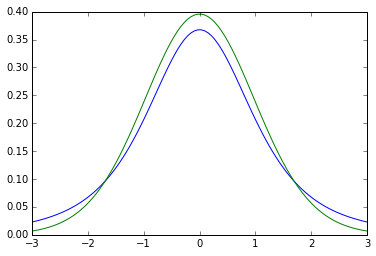

In [36]:
from scipy.stats import t
import matplotlib.pyplot as plt
%matplotlib inline

# 100 values between -3 and 3
x = np.linspace(-3,3,100)

# Compute the pdf with 3 degrees of freedom
print(t.pdf(x=x, df=3))
# Pdf with 3 degrees of freedom
tdist3 = t.pdf(x=x, df=3)
# Pdf with 30 degrees of freedom
tdist30 = t.pdf(x=x, df=30)

# Plot pdfs
plt.plot(x, tdist3)
plt.plot(x, tdist30)

###12: Statistical Significance of Coefficients

Now that we know what the t-distribution is we can use it for significance testing. To do significance testing we must first start by stating our hypothesis. We want to test whether the lean of the tower depends on the year, ie. every year the tower leans a certain amount. This is done by setting null and alternative hypotheses. In our case we will say the null hypothesis is that the lean of the tower of pisa does not depend on the year, meaning the coefficient will be equal to zero. The alternative hypothesis would then follow as the lean of the tower depend on the year, the coefficient is not equal to zero. These are written mathematically as,

H0:β1=0 H1:β1≠0

Testing the null hypothesis is done by using the t-distribution. The t-statistic is defined as,

t = ∣β1^−0∣ / s(β1^)

This statistic measures how many standard deviations the expected coefficient is from 0. If β1 is far from zero with a low variance then t will be very high. We see from the pdf, a t-statistic far from zero will have a very low probability.

####Instructions

Using the formula above, compute the t-statistic of β1. Assign the t-statistic to variable tstat.

In [37]:
tstat = linearfit.params["year"] / np.sqrt(s2b1)
print "tstat ", tstat

tstat  30.0685846877


###13: The P-Value

Finally, now that we've computed the t-statistic we can test our coefficient. Testing the coefficient is easy, we need to find the probability of β1 being different than 0 at some significance level. Lets use the 95% significance level, meaning that we are 95% certian that β1 differs from zero. This is done by using the t-distribution. By computing the cumulative density at the given p-value and degrees of freedom we can retrieve a corresponding probability.

A two-sided test, one which test whether a coefficient is either less than 0 and greater than 0, should be used for linear regression coefficients. For example, the number of meters per year which the tower leans could be either positive or negative and we must check both. To test whether β1 is either positive or negative at the 95% confidence interval we look at the 2.5 and 97.5 percentiles in the distribution, leaving a 95% confidence between the two. Since the t-distribution is symmetrical around zero we can take the absolute value and test only at the 97.5 percentile (the positive side).

If probability is greater than 0.975 than we can reject the null hypothesis (H0) and say that the year significantly affects the lean of the tower. 

H0:β1=0, Accept if Tcdf(|t|,df)>0.975 else accept H1

####Instructions

Do we accept β1>0? Assign the boolean value, True or False, to variable beta1_test.

In [38]:
# At the 95% confidence interval for a two-sided t-test we must use a p-value of 0.975
pval = 0.975
print "pval ", pval

# The degrees of freedom
df = pisa.shape[0] - 2

# The probability to test against
p = t.cdf(tstat, df=df)
print "prob ", p

beta1_test = p > pval

pval  0.975
prob  0.999999999997


###14: Conclusion

Here we learned how to compute and interpret statistics often used to measure linear models. We introduce t-statistics which are used in many field and applications. The assumption of normality is very important in rigorous statistical analysis. This assumption allows each of these statistical tests to be valid. If the assumption is rejected than a different model may be in order.

R-squared is a very powerful measure but it is often over used. A low R-squared value does not necessarily mean that there is no dependency between the variables. For instance, if y=sin(x) the r-square would equal 0 but there is certianly a relationship. A high r-squared value does not necessarily mean that the model is good a predicting future events because it does not account for the number of observations seen.

Student t-tests are great for multivariable regressions where we have many features. The test can allow us to remove certian variables which do not help the model signficantly and keep those which do.

In practice be sure to use the statistics that are most important to your given application and not use ones that could give unreliable results. Following lessons will include statistics such as AIC, BIC, and F-statistic on multivariate linear models.